In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab

from scipy.stats import ttest_ind_from_stats
from sklearn.model_selection import StratifiedKFold

In [11]:
df_path = './2020output_dfR.xlsx'
df = pd.read_excel(df_path)
df = pd.DataFrame(df)

In [12]:
df2020 = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Litigious', 'ModalStrong', 'ModalWeak', 'Negative', 'Positive', 'Uncertainty'])
df2020.columns

Index(['公司代碼', '公司名稱', '交易所主產業標籤', '交易所主產業代碼', '交易所主產業名稱', '交易所子產業代碼',
       '交易所子產業名稱', '事務所碼', '事務所名稱', '是否為四大事務所', '會計師一', '會計師二', 'KAM',
       'KAM_len', 'Litigious%', 'ModalStrong%', 'ModalWeak%', 'Negative%',
       'Positive%', 'Uncertainty%', 'KAM項目數', 'KAM平均詞數', '段落數', '段落平均句數', '字數',
       '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數', '斷詞(詞性標記)'],
      dtype='object')

In [13]:
df2020 = df2020.rename(columns={"Litigious%": "爭議詞比例", "ModalStrong%": "強語氣詞比例","ModalWeak%": "弱語氣詞比例"
                   ,"Negative%": "負面詞比例","Positive%": "正面詞比例","Uncertainty%": "不確定詞比例"})

In [14]:
df_path = './2021output_dfR.xlsx'
df = pd.read_excel(df_path)
df = pd.DataFrame(df)

In [15]:
df2021 = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Litigious', 'ModalStrong', 'ModalWeak', 'Negative', 'Positive', 'Uncertainty'])
df2021.columns

Index(['公司代碼', '公司名稱', '交易所主產業標籤', '交易所主產業代碼', '交易所主產業名稱', '交易所子產業代碼',
       '交易所子產業名稱', '事務所碼', '事務所名稱', '是否為四大事務所', '會計師一', '會計師二', 'KAM',
       'KAM_len', 'Litigious%', 'ModalStrong%', 'ModalWeak%', 'Negative%',
       'Positive%', 'Uncertainty%', 'KAM項目數', 'KAM平均詞數', '段落數', '段落平均句數', '字數',
       '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數', '斷詞(詞性標記)'],
      dtype='object')

In [16]:
df2021 = df2021.rename(columns={"Litigious%": "爭議詞比例", "ModalStrong%": "強語氣詞比例","ModalWeak%": "弱語氣詞比例"
                   ,"Negative%": "負面詞比例","Positive%": "正面詞比例","Uncertainty%": "不確定詞比例"})

In [17]:
df_T = df2020
df_F = df2021

#### 敘述性統計

In [18]:
def StatisticalNarrativesToFrameByOne(frame):
    sncount = []
    snmean = []
    snstd = []
    snmax = []
    snmin = []
    snind = []
    for x in inde:
        sncount.append(frame[x].count())
        snmean.append(frame[x].mean())
        snstd.append(frame[x].std())
        snmax.append(frame[x].max())
        snmin.append(frame[x].min())
    StatRes = pd.DataFrame()
    StatRes['Count'] = sncount
    StatRes['Mean'] = snmean
    StatRes['StD'] = snstd
    StatRes['Max'] = snmax
    StatRes['Min'] = snmin     
    StatRes.index = inde
    
    return(StatRes)

In [19]:
typee = ['四大','非四大']
def StatisticalNarrativesToFrameGather():
    sncount = []
    snmean = []
    snstd = []
    snmax = []
    snmin = []
    snind = []
    for x in inde:
        sncount.append(df_T[x].count())
        snmean.append(df_T[x].mean())
        snstd.append(df_T[x].std())
        snmax.append(df_T[x].max())
        snmin.append(df_T[x].min())
    for x in inde:       
        sncount.append(df_F[x].count())
        snmean.append(df_F[x].mean())
        snstd.append(df_F[x].std())
        snmax.append(df_F[x].max())
        snmin.append(df_F[x].min())
    
    for t in typee:
        for i in inde:
            o = t + "_" + i
            snind.append(o)
    
    StatRes = pd.DataFrame()
    StatRes['Count'] = sncount
    StatRes['Mean'] = snmean
    StatRes['StD'] = snstd
    StatRes['Max'] = snmax
    StatRes['Min'] = snmin     
    StatRes.index = snind
    
    return(StatRes)

In [20]:
def TTestToFrame():
    tsc = []
    tpva = []
    T_nobs = len(df_T) #資料筆數
    F_nobs = len(df_F)
    for x in inde:
        df_TLen = df_T[x]
        T_mean = df_TLen.mean()
        T_std = df_TLen.std()
        
        df_FLen = df_F[x]
        F_mean = df_FLen.mean()
        F_std = df_FLen.std()

        TScore, TPValue = ttest_ind_from_stats(mean1 = T_mean, std1 = T_std, nobs1 = T_nobs, 
                     mean2 = F_mean, std2 = F_std, nobs2 = F_nobs, equal_var=True, alternative='two-sided')
        
        tsc.append(TScore)
        tpva.append(TPValue.item())
        
    TTestRes = pd.DataFrame()
    TTestRes['T-Score'] = tsc
    TTestRes['P-Value'] = tpva
    TTestRes.index = inde
    
    return(TTestRes)

In [21]:
inde = ['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例', '段落數', '段落平均句數', '字數',
       '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
a = StatisticalNarrativesToFrameByOne(df_T)
a

,Count,Mean,StD,Max,Min
KAM_len,2044,1503.795010,283.790255,3490.000000,134.000000
KAM項目數,2044,1.635029,0.703718,5.000000,1.000000
KAM平均詞數,2044,1037.416580,323.647622,2958.000000,134.000000
爭議詞比例,2044,0.075937,0.010046,0.102800,0.041300
強語氣詞比例,2044,0.002124,0.000717,0.016900,0.000000
弱語氣詞比例,2044,0.005644,0.000941,0.009900,0.000000
負面詞比例,2044,0.017402,0.002855,0.042300,0.000000
正面詞比例,2044,0.075937,0.010046,0.102800,0.041300
不確定詞比例,2044,0.032372,0.004431,0.050900,0.014500
段落數,2044,1.000000,0.000000,1.000000,1.000000


In [22]:
b=StatisticalNarrativesToFrameByOne(df_F)
b

,Count,Mean,StD,Max,Min
KAM_len,1550,1506.823226,289.888761,3490.000000,134.000000
KAM項目數,1550,1.624516,0.700211,5.000000,1.000000
KAM平均詞數,1550,1045.240381,325.360113,2928.000000,134.000000
爭議詞比例,1550,0.075832,0.010206,0.102800,0.041300
強語氣詞比例,1550,0.002124,0.000735,0.016900,0.000000
弱語氣詞比例,1550,0.005636,0.000921,0.009900,0.000000
負面詞比例,1550,0.017456,0.002966,0.042300,0.000000
正面詞比例,1550,0.075832,0.010206,0.102800,0.041300
不確定詞比例,1550,0.032373,0.004465,0.050900,0.014900
段落數,1550,1.000000,0.000000,1.000000,1.000000


In [23]:
c = TTestToFrame()
c

,T-Score,P-Value
KAM_len,-0.313889,0.753623
KAM項目數,0.444516,0.656696
KAM平均詞數,-0.716096,0.473979
爭議詞比例,0.307712,0.758319
強語氣詞比例,0.021382,0.982942
弱語氣詞比例,0.232955,0.815809
負面詞比例,-0.549131,0.582950
正面詞比例,0.307712,0.758319
不確定詞比例,-0.006998,0.994417
段落數,NaN,NaN


#### 模型

In [12]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

import sklearn.metrics as metrics

In [13]:
df.columns

Index(['公司代碼', '公司名稱', '交易所主產業標籤', '交易所主產業代碼', '交易所主產業名稱', '交易所子產業代碼',
       '交易所子產業名稱', '事務所碼', '事務所名稱', '是否為四大事務所', '會計師一', '會計師二', 'KAM',
       'KAM_len', '爭議詞比例', '強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例',
       'KAM項目數', 'KAM平均詞數', '段落數', '段落平均句數', '字數', '詞數', '相異詞數比率', '難詞數',
       '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數', '三字詞數', '句數', '句平均詞數',
       '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數', '否定詞數', '複雜語意類別句子數',
       '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數', '連接詞數', '正向連接詞數',
       '負向連接詞數', '斷詞(詞性標記)'],
      dtype='object')

In [14]:
from sklearn.linear_model import LogisticRegression
names = ["Decision Tree", "Naive Bayes", "Logistic Regression", "AdaBoost", "Random Forest", "XGBoost"]
classifiers = [DecisionTreeClassifier(),
               GaussianNB(),
               LogisticRegression(),
               AdaBoostClassifier(),
               RandomForestClassifier(),
               XGBClassifier()           ]

In [15]:
def forKFoldclassifiscore(clf,X,y):
    #kf = KFold(n_splits=10,shuffle = True, random_state=0)
    cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    scoring = ['accuracy' ,'precision_micro','recall_micro','f1_micro','precision','recall','f1','precision_macro','recall_macro','f1_macro','roc_auc']
    clf.fit(X, y)  
    for s in scoring:
        print(s)
        results = cross_val_score(estimator=clf,X=X,y=y,cv=cv,scoring=s)
        #print(results)
        #print(results.mean())
        if s=='accuracy':
            ac.append(results.mean())
        if s=='precision':
            pre.append(results.mean())
        if s=='recall':
            rec.append(results.mean())
        if s=='f1':
            f1.append(results.mean())
        if s=='precision_macro':
            pre_ma.append(results.mean())
        if s=='recall_macro':
            rec_ma.append(results.mean())
        if s=='f1_macro':
            f1_ma.append(results.mean())
        if s=='roc_auc':
            roc.append(results.mean())
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    #confusionMatrix = confusion_matrix(y, y_pred, labels=[1, 0])
    #print(confusionMatrix)
    confusion_matrix = metrics.confusion_matrix(y, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot()
    plt.show()


In [16]:
def ResultToFrame():
    result_df = pd.DataFrame()
    result_df['Accuracy'] = ac
    result_df['Presicion'] = pre
    result_df['Presicion_macro'] = pre_ma
    result_df['Recall'] = rec
    result_df['Recall_macro'] = rec_ma
    result_df['F1'] = f1
    result_df['F1_macro'] = f1_ma
    result_df['ROC'] = roc
    result_df.index = names
    return(result_df)

In [17]:
col=['KAM_len', 'KAM項目數', 'KAM平均詞數']
X=df[col]
y=df['是否為四大事務所']

col=['爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例']
X1=df[col]
y1=df['是否為四大事務所']

col=['字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X2=df[col]
y2=df['是否為四大事務所']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例']
X3=df[col]
y3=df['是否為四大事務所']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數', '字數','詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X4=df[col]
y4=df['是否為四大事務所']

col=['爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例', '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X5=df[col]
y5=df['是否為四大事務所']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例', '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X6=df[col]
y6=df['是否為四大事務所']

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


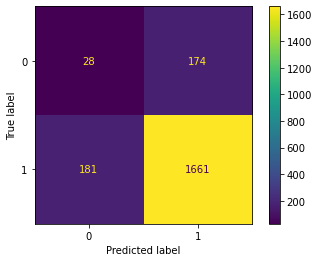

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


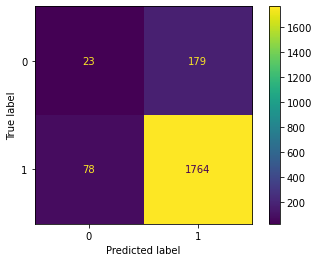

Logistic Regression
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

recall_macro
f1_macro
roc_auc


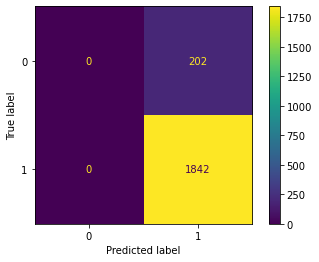

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

recall_macro
f1_macro
roc_auc


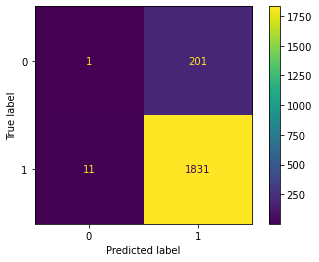

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


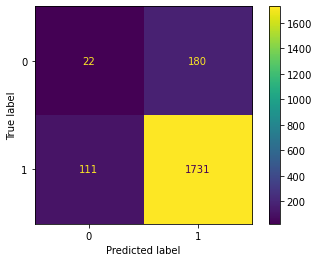

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


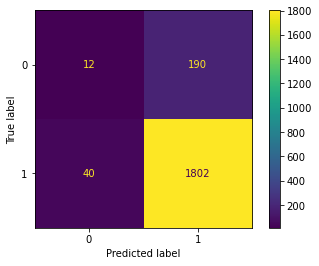

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.827293,0.905464,0.518752,0.903367,0.520969,0.903405,0.518757,0.508806
Naive Bayes,0.874280,0.907907,0.567173,0.957656,0.535971,0.932041,0.540543,0.636551
Logistic Regression,0.901176,0.901176,0.450588,1.000000,0.500000,0.948019,0.474009,0.624176
AdaBoost,0.896286,0.901077,0.457681,0.994022,0.499392,0.945250,0.476196,0.629896
Random Forest,0.855679,0.905260,0.530881,0.936484,0.524550,0.922719,0.522568,0.572535
XGBoost,0.887473,0.904684,0.549312,0.978273,0.518779,0.939970,0.512578,0.598552


In [18]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#KAM敘述
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X,y)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


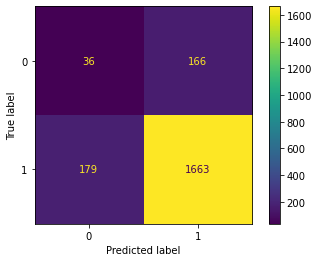

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro
f1_macro
roc_auc


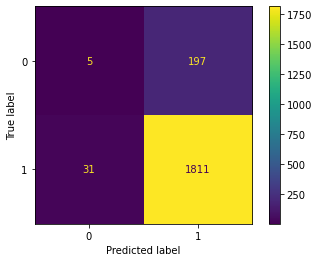

Logistic Regression
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

roc_auc


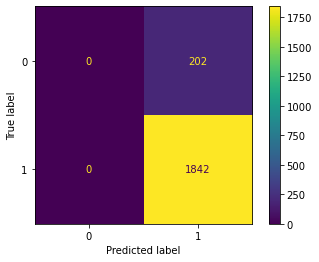

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro
f1_macro
roc_auc


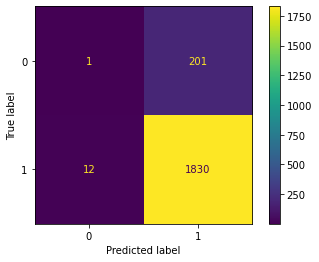

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

recall_macro
f1_macro
roc_auc


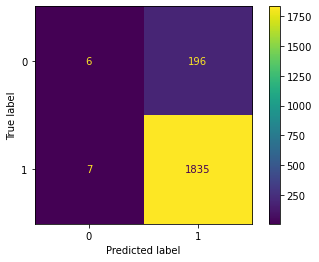

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


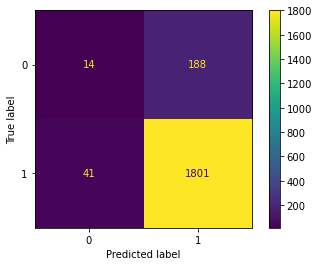

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.830717,0.910909,0.537680,0.898481,0.551556,0.908818,0.539095,0.552151
Naive Bayes,0.888441,0.901891,0.549279,0.983155,0.504078,0.940718,0.490846,0.613412
Logistic Regression,0.901176,0.901176,0.450588,1.000000,0.500000,0.948019,0.474009,0.541662
AdaBoost,0.895787,0.901035,0.500517,0.993478,0.499239,0.944989,0.477257,0.604986
Random Forest,0.899708,0.902264,0.534867,0.996739,0.508133,0.946524,0.491607,0.640513
XGBoost,0.887958,0.905489,0.614887,0.977738,0.523393,0.940182,0.523305,0.600954


In [19]:
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#情感比率
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X1,y1)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


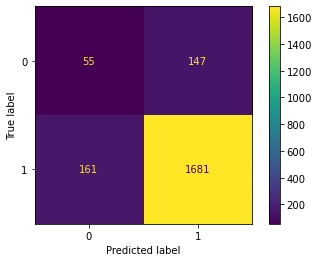

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


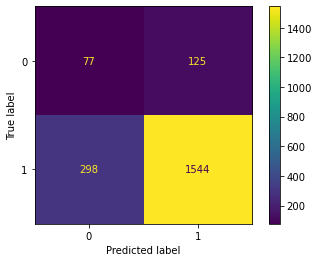

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

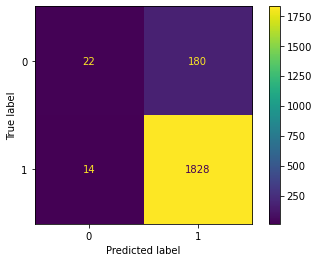

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


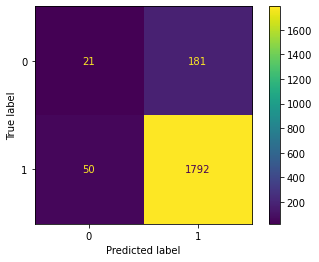

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro
f1_macro
roc_auc


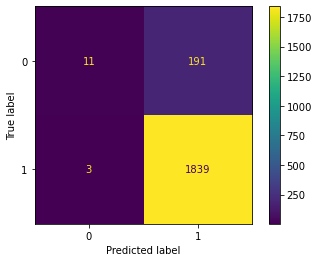

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


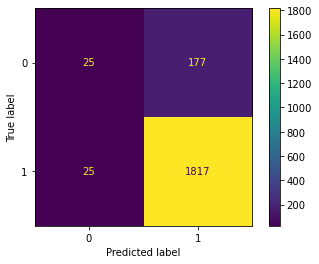

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.849811,0.917476,0.586138,0.915855,0.585055,0.916007,0.591990,0.587492
Naive Bayes,0.793066,0.925096,0.568208,0.838208,0.610175,0.879022,0.574238,0.709959
Logistic Regression,0.905091,0.910375,0.792688,0.992400,0.550724,0.949603,0.566117,0.759104
AdaBoost,0.886999,0.908281,0.612360,0.972858,0.538453,0.939427,0.545459,0.734087
Random Forest,0.904610,0.903959,0.761054,0.997826,0.526143,0.948619,0.515849,0.792391
XGBoost,0.901179,0.911252,0.706578,0.986431,0.555001,0.947340,0.571846,0.801244


In [20]:
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X2,y2)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


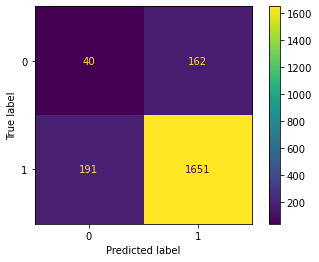

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


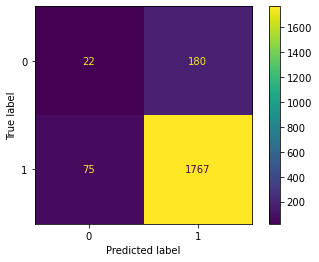

Logistic Regression
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

recall_macro
f1_macro
roc_auc


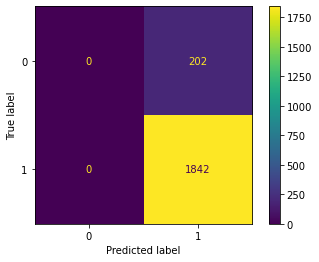

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro
f1_macro
roc_auc


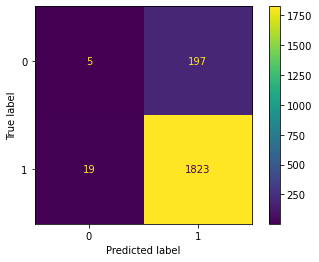

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro
f1_macro
roc_auc


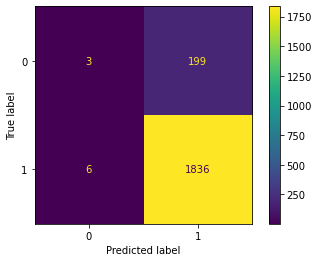

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


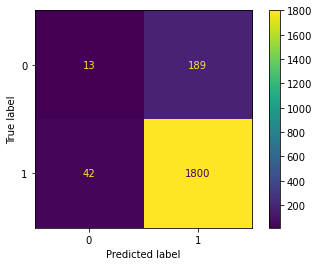

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.825823,0.909579,0.528289,0.895793,0.536839,0.900323,0.530290,0.541358
Naive Bayes,0.875258,0.907574,0.569456,0.959286,0.534286,0.932633,0.538718,0.655716
Logistic Regression,0.901176,0.901176,0.450588,1.000000,0.500000,0.948019,0.474009,0.624864
AdaBoost,0.894323,0.902484,0.547076,0.989680,0.507102,0.944057,0.492803,0.655688
Random Forest,0.898728,0.901977,0.525812,0.995115,0.507440,0.946578,0.481986,0.693803
XGBoost,0.886980,0.904986,0.578803,0.977194,0.520740,0.939679,0.519691,0.661837


In [21]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#KAM敘述+情感
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X3,y3)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


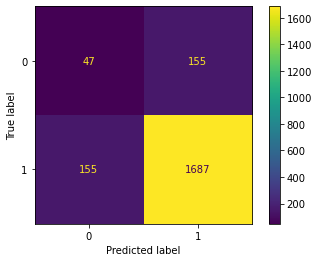

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


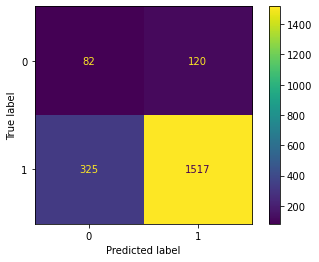

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


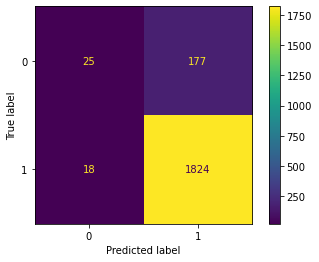

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


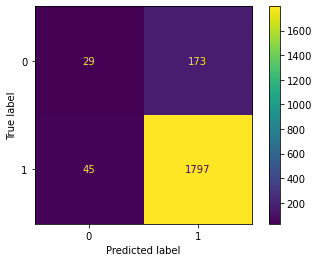

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro
f1_macro
roc_auc


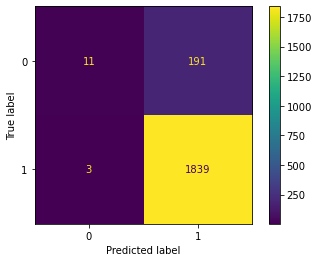

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


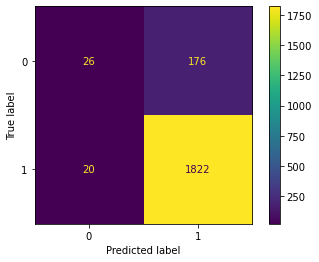

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.849316,0.916851,0.571440,0.922908,0.572999,0.916936,0.579419,0.568031
Naive Bayes,0.782298,0.926785,0.566089,0.823549,0.615108,0.871463,0.570911,0.707284
Logistic Regression,0.904605,0.911574,0.786203,0.990220,0.557134,0.949244,0.574982,0.780173
AdaBoost,0.893350,0.912197,0.675447,0.975570,0.559452,0.942761,0.575713,0.757615
Random Forest,0.903130,0.905988,0.711054,0.996742,0.521837,0.947883,0.510631,0.788269
XGBoost,0.904115,0.911971,0.726819,0.989145,0.558858,0.948973,0.576409,0.799373


In [22]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#KAM敘述+可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X4,y4)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


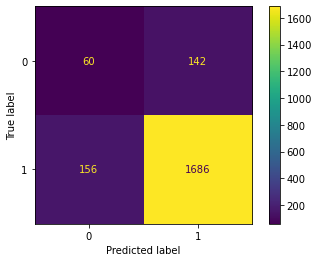

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


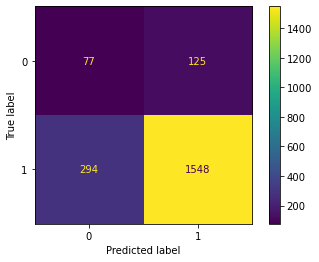

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

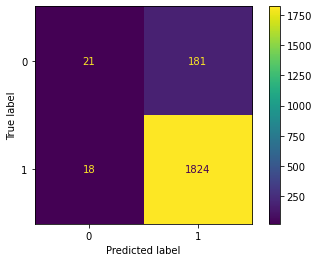

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


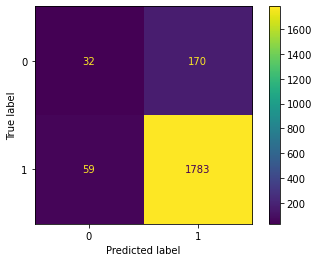

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro
f1_macro
roc_auc


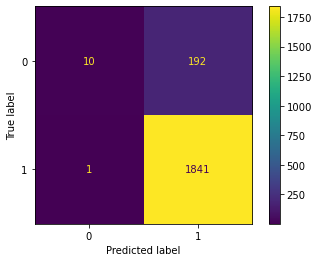

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


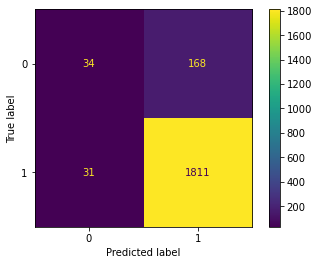

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.852738,0.921792,0.596853,0.912582,0.582402,0.920008,0.603423,0.595415
Naive Bayes,0.795026,0.925289,0.569100,0.840382,0.611262,0.880364,0.575662,0.712123
Logistic Regression,0.902642,0.909755,0.767973,0.990229,0.547138,0.948259,0.559076,0.761346
AdaBoost,0.887963,0.912964,0.645778,0.967964,0.563030,0.939606,0.578073,0.754755
Random Forest,0.903137,0.905508,0.786073,0.998913,0.532109,0.949438,0.516240,0.809164
XGBoost,0.902635,0.915128,0.736869,0.983173,0.575753,0.947905,0.600946,0.814694


In [23]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#情感+可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X5,y5)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


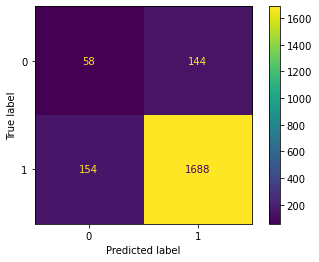

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


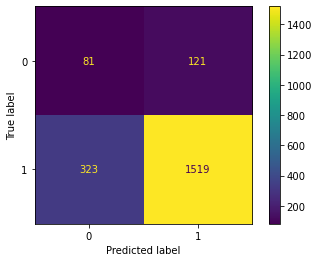

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

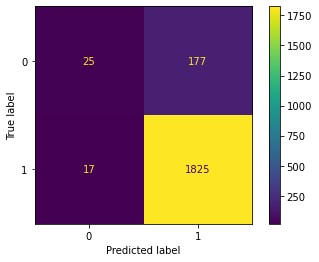

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


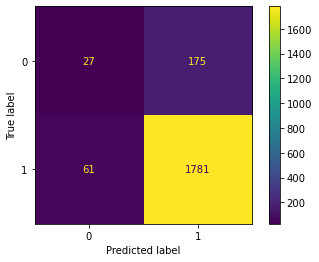

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro
f1_macro
roc_auc


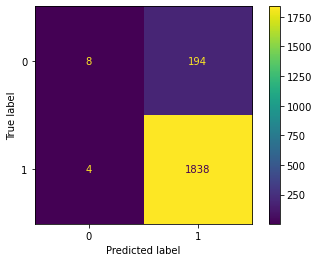

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


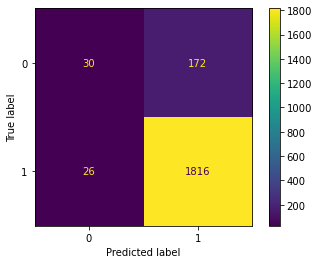

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.848831,0.918685,0.592030,0.911498,0.595344,0.917540,0.599239,0.595115
Naive Bayes,0.782788,0.926339,0.565275,0.824636,0.613151,0.871874,0.569942,0.708910
Logistic Regression,0.905093,0.911613,0.796223,0.990761,0.557404,0.949515,0.575784,0.780795
AdaBoost,0.884541,0.910569,0.610242,0.966883,0.550346,0.937836,0.560398,0.754043
Random Forest,0.903135,0.905084,0.702047,0.999457,0.516413,0.949384,0.520514,0.808903
XGBoost,0.903125,0.913518,0.747949,0.985881,0.567226,0.948291,0.589083,0.822059


In [24]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#ALL
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X6,y6)
ResultToFrame()

#### 四大事務所差異

In [25]:
#判斷四大會計事務所1-4
ju = []
af = df[["事務所碼"]]
for (index, colname) in enumerate(af):
    f = af[colname].values
for i in range(len(f)):
    if f[i] == 'KK149': #資誠聯合
        boo = 1
        ju.append(boo)
    elif f[i] == 'KK152':  #安侯建業聯合
        boo = 2
        ju.append(boo)
    elif f[i] == 'KK158':  #安永聯合
        boo = 3
        ju.append(boo)
    elif f[i] == 'KK203':  #勤業眾信聯合
        boo = 4
        ju.append(boo)
    else:
        boo = 0
        ju.append(boo)


df["四大事務所編碼"] = ju

In [26]:
df.columns

Index(['公司代碼', '公司名稱', '交易所主產業標籤', '交易所主產業代碼', '交易所主產業名稱', '交易所子產業代碼',
       '交易所子產業名稱', '事務所碼', '事務所名稱', '是否為四大事務所', '會計師一', '會計師二', 'KAM',
       'KAM_len', '爭議詞比例', '強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例',
       'KAM項目數', 'KAM平均詞數', '段落數', '段落平均句數', '字數', '詞數', '相異詞數比率', '難詞數',
       '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數', '三字詞數', '句數', '句平均詞數',
       '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數', '否定詞數', '複雜語意類別句子數',
       '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數', '連接詞數', '正向連接詞數',
       '負向連接詞數', '斷詞(詞性標記)', '四大事務所編碼'],
      dtype='object')

#### one-way ANOVA

In [27]:
#df.to_excel("anova_df.xlsx") 

In [28]:
def OneWayAnovaToFrame(xlist):
    fvalue = []
    anovapvalue = []
    for i in xlist:
        lenzero = df[df['四大事務所編碼']==0][i]
        lenone = df[df['四大事務所編碼']==1][i]
        lentwo = df[df['四大事務所編碼']==2][i]
        lenthree = df[df['四大事務所編碼']==3][i]
        lenfour = df[df['四大事務所編碼']==4][i]

        FValue, pValue = stats.f_oneway(lenzero, lenone, lentwo, lenthree, lenfour)
        #print(FValue, pValue)
        fvalue.append(FValue)
        anovapvalue.append(pValue)
        
        
    anoresult_df = pd.DataFrame()
    anoresult_df['F-Score'] = fvalue
    anoresult_df['P-Value'] = anovapvalue
    anoresult_df.index = xlist
    return(anoresult_df)

In [29]:
#區分是否為四大會計師事務所
zero = (df["四大事務所編碼"] == 0)
df_zero = df[zero]
one = (df["四大事務所編碼"] == 1)
df_one = df[one]
two = (df["四大事務所編碼"] == 2)
df_two = df[two]
three = (df["四大事務所編碼"] == 3)
df_three = df[three]
four = (df["四大事務所編碼"] == 4)
df_four = df[four]

In [30]:
def MutiStatisticalNarrativesToFrameByOne(frame):
    sncount = []
    snmean = []
    snstd = []
    snmax = []
    snmin = []
    snind = []
    for x in inde:
        sncount.append(frame[x].count())
        snmean.append(frame[x].mean())
        snstd.append(frame[x].std())
        snmax.append(frame[x].max())
        snmin.append(frame[x].min())
    StatRes = pd.DataFrame()
    StatRes['Count'] = sncount
    StatRes['Mean'] = snmean
    StatRes['StD'] = snstd   
    StatRes.index = inde
    
    return(StatRes)

In [31]:
d = MutiStatisticalNarrativesToFrameByOne(df_zero)
e = MutiStatisticalNarrativesToFrameByOne(df_one)
f = MutiStatisticalNarrativesToFrameByOne(df_two)
g = MutiStatisticalNarrativesToFrameByOne(df_three)
h = MutiStatisticalNarrativesToFrameByOne(df_four)

In [32]:
from scipy import stats
col=['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例',
     '段落數', '段落平均句數', '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
i = OneWayAnovaToFrame(col)
i

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


,F-Score,P-Value
KAM_len,115.961599,3.355966e-89
KAM項目數,191.839794,1.036601e-139
KAM平均詞數,138.233483,1.260946e-104
爭議詞比例,45.742506,7.593508e-37
強語氣詞比例,59.127088,2.745571e-47
弱語氣詞比例,76.390557,1.993309e-60
負面詞比例,13.814231,4.040302e-11
正面詞比例,45.742506,7.593508e-37
不確定詞比例,86.372029,7.393480e-68
段落數,NaN,NaN


In [33]:
names = ["Decision Tree", "Naive Bayes", "AdaBoost", "Random Forest", "XGBoost"]
classifiers = [DecisionTreeClassifier(),
               GaussianNB(),
               AdaBoostClassifier(),
               RandomForestClassifier(),
               XGBClassifier()           ]

In [34]:
col=['KAM_len', 'KAM項目數', 'KAM平均詞數']
X=df[col]
y=df['四大事務所編碼']

col=['爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例']
X1=df[col]
y1=df['四大事務所編碼']

col=['字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X2=df[col]
y2=df['四大事務所編碼']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例']
X3=df[col]
y3=df['四大事務所編碼']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數', '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X4=df[col]
y4=df['四大事務所編碼']

col=['爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例', '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X5=df[col]
y5=df['四大事務所編碼']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例',
     '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X6=df[col]
y6=df['四大事務所編碼']

In [35]:
def MutiforKFoldclassifiscore(clf,X,y):
    #kf = KFold(n_splits=10,shuffle = True, random_state=0)
    cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    #scoring = ['accuracy' ,'precision_micro','recall_micro','f1_micro','precision_macro','recall_macro','f1_macro']
    scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
    clf.fit(X, y) 
    for s in scoring:
        print(s)
        results = cross_val_score(estimator=clf,X=X,y=y,cv=cv,scoring=s)
        #print(results)
        #print(results.mean())
        if s=='accuracy':
            ac.append(results.mean())
        if s=='precision_macro':
            pre_ma.append(results.mean())
        if s=='recall_macro':
            rec_ma.append(results.mean())
        if s=='f1_macro':
            f1_ma.append(results.mean())
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    confusionMatrix = confusion_matrix(y, y_pred, labels=[0, 1, 2, 3, 4])
    print(confusionMatrix)
    
    confusion_matrix2 = metrics.confusion_matrix(y, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [0, 1, 2, 3, 4])

    cm_display.plot()
    plt.show()

In [36]:
def MutiResultToFrame():
    result_df = pd.DataFrame()
    result_df['Accuracy'] = ac
    result_df['Presicion_macro'] = pre_ma
    result_df['Recall_macro'] = rec_ma
    result_df['F1_macro'] = f1_ma
    result_df.index = names
    return(result_df)

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 36  69  40  18  39]
 [ 80 190  85  36  98]
 [ 67  93 113  37 100]
 [ 31  55  52  15  30]
 [ 62 132  94  31 441]]


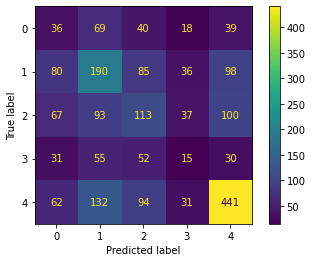

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

[[  6 118  28   1  49]
 [ 17 323  20   0 129]
 [ 11 209  73   2 115]
 [  7 116  22   0  38]
 [  3 100  13   2 642]]


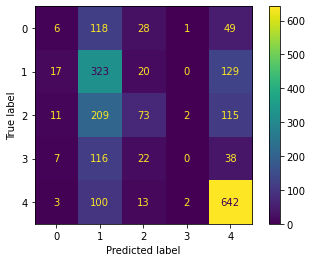

AdaBoost
accuracy
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

recall_macro
f1_macro
[[  8  78  67   0  49]
 [  9 251 101   2 126]
 [  3  75 218   1 113]
 [  4  64  78   2  35]
 [  9  54  66   0 631]]


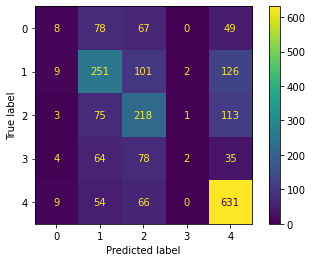

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 25  64  46  22  45]
 [ 60 177  83  50 119]
 [ 45  78 117  53 117]
 [ 23  47  55  15  43]
 [ 32  89  87  35 517]]


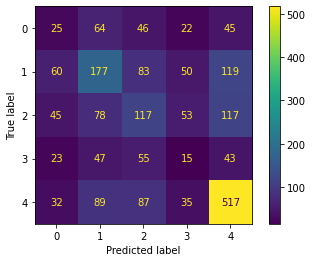

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 20  76  52   6  48]
 [ 38 230  78  24 119]
 [ 28  95 129  36 122]
 [ 10  59  58  13  43]
 [ 17  80  59  18 586]]


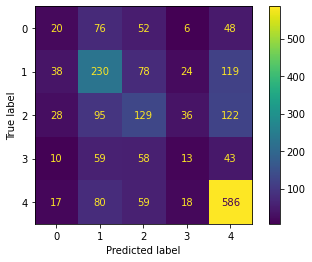

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.388955,0.305726,0.300984,0.300363
Naive Bayes,0.510758,0.334902,0.342537,0.304314
AdaBoost,0.543094,0.386672,0.385161,0.354740
Random Forest,0.426633,0.317154,0.311774,0.311451
XGBoost,0.478486,0.345847,0.345227,0.337527


In [37]:
#Y是否、是哪一四大事務所
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#KAM敘述
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X,y)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 35  46  44  20  57]
 [ 41 222  71  29 126]
 [ 47  69 172  38  84]
 [ 17  31  40  57  38]
 [ 76 133  82  45 424]]


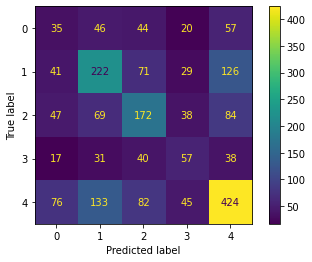

Naive Bayes
accuracy
precision_macro
recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1_macro
[[  2  53  51  26  70]
 [ 11 141  75  39 223]
 [  6  45 222  39  98]
 [  5  17  12  90  59]
 [  7  94  66  30 563]]


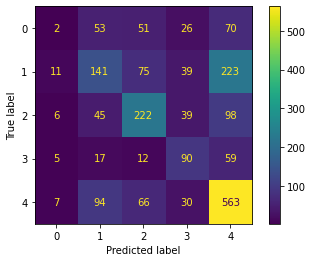

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[  5  58  61  23  55]
 [  3 265  86  30 105]
 [ 11  76 214  30  79]
 [  5  25  21  88  44]
 [  6 131  83  32 508]]


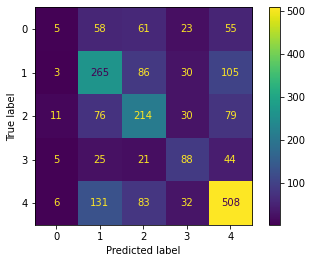

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 12  61  50  12  67]
 [ 10 301  56   9 113]
 [ 14  63 226  22  85]
 [  8  33  26  71  45]
 [  8 128  65  21 538]]


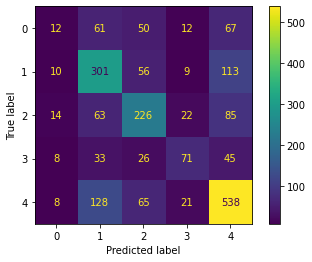

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 19  49  55  13  66]
 [ 21 281  62  16 109]
 [ 19  56 211  29  95]
 [ 16  30  20  73  44]
 [ 19 117  57  20 547]]


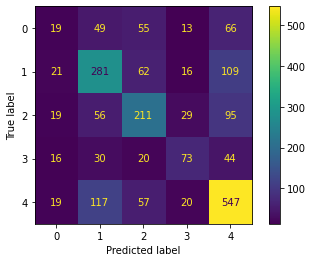

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.446671,0.377826,0.375066,0.380938
Naive Bayes,0.498013,0.399680,0.414332,0.390353
AdaBoost,0.528369,0.423545,0.447625,0.426921
Random Forest,0.564570,0.486474,0.468039,0.455225
XGBoost,0.553348,0.479932,0.460306,0.461612


In [38]:
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#情感比率
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X1,y1)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 42  41  53  12  54]
 [ 33 326  49   6  75]
 [ 40  41 248  16  65]
 [ 13   3  24 127  16]
 [ 55  88  48  18 551]]


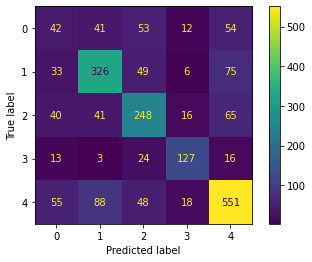

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro
[[ 46  17  58  13  68]
 [ 36 231  46   8 168]
 [ 29  22 171  14 174]
 [  3   1  30 108  41]
 [ 20  22  45  12 661]]


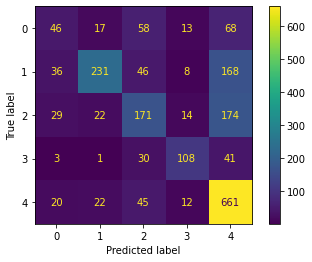

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 30  50  53  14  55]
 [ 14 372  29   0  74]
 [ 41  71 185  16  97]
 [ 10   1   6 153  13]
 [ 26  75  33  11 615]]


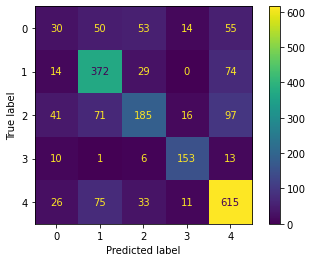

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 46  40  54   8  54]
 [  9 380  22   1  77]
 [ 14  36 301  11  48]
 [  2   2   3 152  24]
 [ 15  58  22   5 660]]


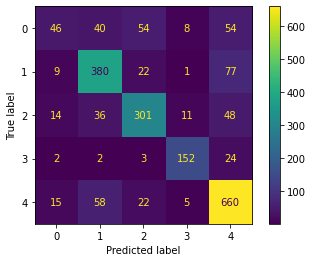

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 57  38  51  12  44]
 [ 12 388  27   0  62]
 [ 20  25 320  13  32]
 [  1   4   2 163  13]
 [ 30  44  21  11 654]]


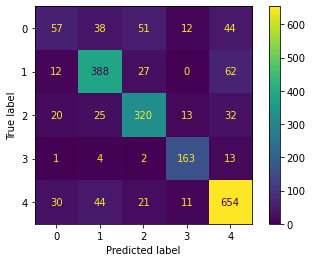

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.637963,0.593918,0.581867,0.587697
Naive Bayes,0.595399,0.584103,0.515385,0.527423
AdaBoost,0.662891,0.612377,0.600948,0.595594
Random Forest,0.750017,0.719325,0.683929,0.697610
XGBoost,0.773948,0.730710,0.721193,0.718122


In [39]:
#Y是否、是哪一四大事務所
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X2,y2)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 39  48  45  28  42]
 [ 55 255  52  22 105]
 [ 58  60 190  32  70]
 [ 25  23  36  71  28]
 [ 44 106  81  33 496]]


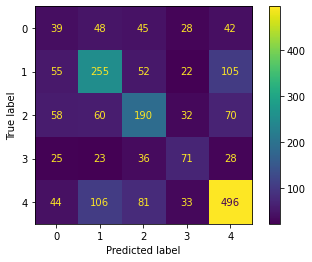

Naive Bayes
accuracy
precision_macro
recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

f1_macro
[[  2  95  56   0  49]
 [ 11 311  38   0 129]
 [ 10 103 179   3 115]
 [  7  85  53   0  38]
 [  3  67  46   2 642]]


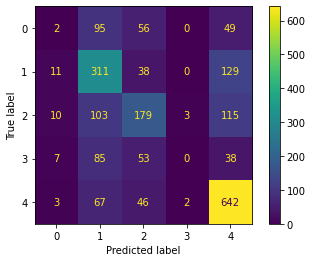

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 20  60  50  22  50]
 [ 26 303  58  18  84]
 [ 25  51 231  28  75]
 [ 14  26  25  72  46]
 [  8  73  62  24 593]]


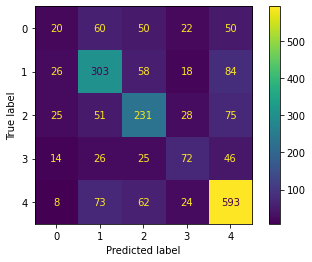

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 22  58  54  15  53]
 [ 17 321  41  10 100]
 [ 28  51 223  23  85]
 [ 13  24  35  77  34]
 [ 18  85  54  22 581]]


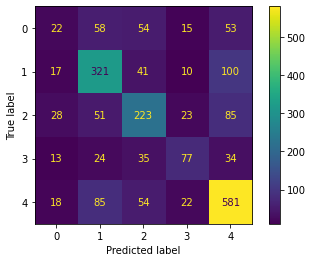

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 24  55  58  14  51]
 [ 25 318  47  12  87]
 [ 21  55 233  22  79]
 [ 18  26  30  77  32]
 [ 12  98  53  17 580]]


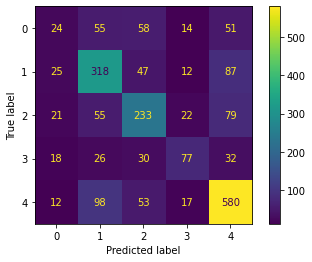

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.508831,0.442595,0.434164,0.433329
Naive Bayes,0.554809,0.337414,0.385385,0.351313
AdaBoost,0.596353,0.493551,0.491306,0.486307
Random Forest,0.606165,0.523757,0.511262,0.514472
XGBoost,0.602728,0.532416,0.504297,0.506681


In [40]:
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#KAM敘述+情感比率
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X3,y3)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 49  35  51  12  55]
 [ 34 336  48   7  64]
 [ 46  47 246  17  54]
 [ 17   3  22 124  17]
 [ 57  77  47  18 561]]


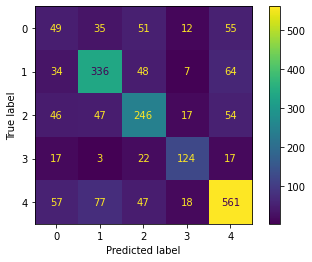

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro
[[ 48  18  65  13  58]
 [ 40 242  51   7 149]
 [ 32  23 200  13 142]
 [  3   1  34 109  36]
 [ 22  23  49  11 655]]


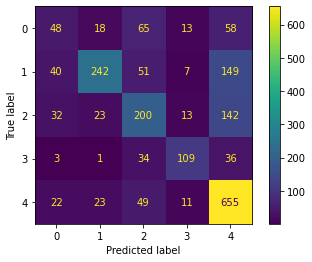

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 30  46  59  12  55]
 [ 12 371  28   0  78]
 [ 35  56 201  15 103]
 [ 13   0  12 148  10]
 [ 31  85  30  11 603]]


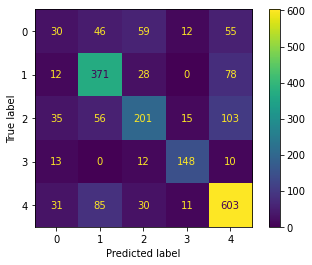

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 42  39  59   7  55]
 [  8 381  19   0  81]
 [ 14  24 313  13  46]
 [  3   3   6 155  16]
 [ 17  52  18   6 667]]


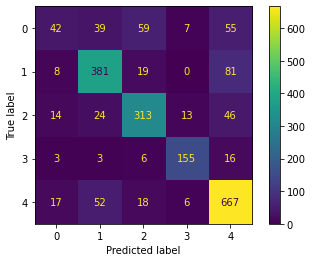

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 60  33  51  12  46]
 [ 14 389  18   0  68]
 [ 23  20 331  11  25]
 [  0   2   3 166  12]
 [ 24  47  19   9 661]]


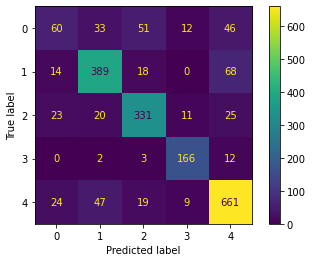

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.646275,0.590999,0.591615,0.595053
Naive Bayes,0.613522,0.597135,0.535570,0.547333
AdaBoost,0.661932,0.616402,0.599990,0.596880
Random Forest,0.756373,0.735514,0.692385,0.695515
XGBoost,0.786188,0.746702,0.735255,0.732889


In [41]:
#Y是否、是哪一四大事務所
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#KAM敘述+可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X4,y4)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 55  34  50  12  51]
 [ 46 320  42   8  73]
 [ 49  38 261  15  47]
 [ 12   8  15 129  19]
 [ 70  58  55  15 562]]


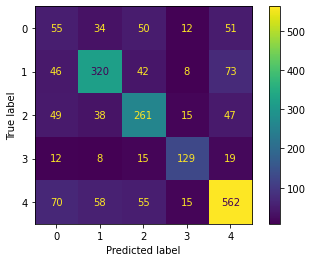

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro
[[ 45  18  59  13  67]
 [ 32 241  42   8 166]
 [ 28  22 172  14 174]
 [  3   1  29 108  42]
 [ 19  20  49  12 660]]


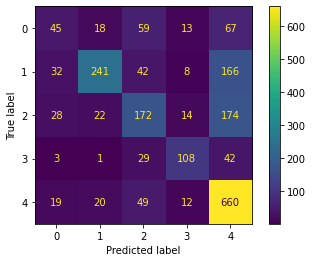

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 29  49  55  14  55]
 [ 21 377  20   0  71]
 [ 34  68 192  15 101]
 [ 12   0   8 151  12]
 [ 32  78  27   9 614]]


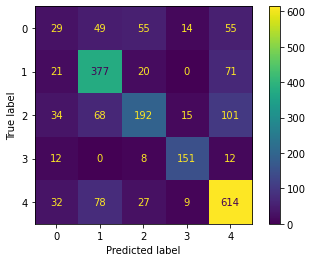

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 45  37  58   6  56]
 [  7 391  22   0  69]
 [ 10  29 311  12  48]
 [  2   3   3 156  19]
 [ 11  47  21   5 676]]


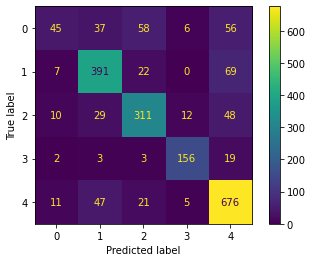

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 61  30  53  10  48]
 [ 13 400  18   1  57]
 [ 28  23 321  11  27]
 [  2   2   3 168   8]
 [ 25  48  27   8 652]]


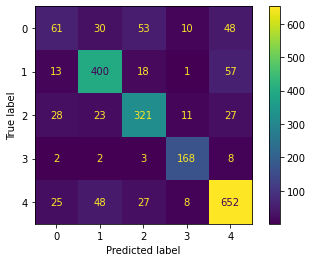

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.649185,0.603207,0.604532,0.597500
Naive Bayes,0.599802,0.589966,0.518700,0.532200
AdaBoost,0.666767,0.612189,0.603142,0.598158
Random Forest,0.772011,0.770328,0.703488,0.714390
XGBoost,0.783749,0.738673,0.735684,0.731500


In [42]:
#Y是否、是哪一四大事務所
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#情感+可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X5,y5)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 58  25  56   9  54]
 [ 36 315  45   9  84]
 [ 43  33 264  14  56]
 [ 10   4  16 134  19]
 [ 71  62  62  16 549]]


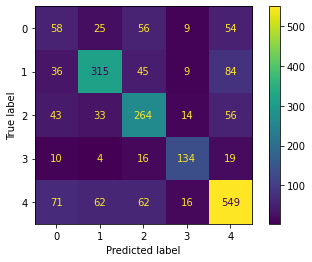

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro
[[ 46  18  67  13  58]
 [ 39 246  49   7 148]
 [ 31  22 201  13 143]
 [  3   1  34 109  36]
 [ 21  22  51  11 655]]


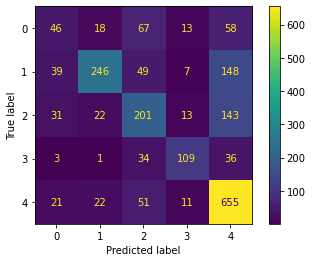

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 35  39  64  14  50]
 [ 20 376  24   0  69]
 [ 30  46 226  12  96]
 [ 11   0   8 152  12]
 [ 30  71  30   8 621]]


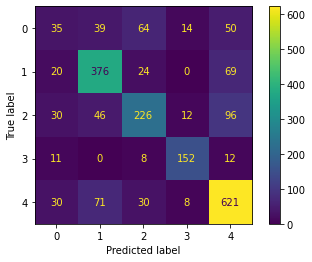

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 52  34  51   9  56]
 [  7 393  15   0  74]
 [ 11  23 317  12  47]
 [  1   2   5 157  18]
 [ 13  48  17   5 677]]


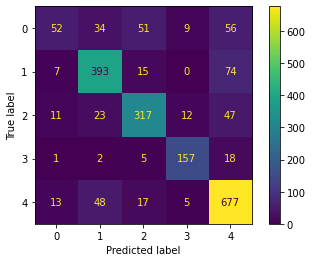

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 68  35  46  10  43]
 [ 11 395  18   1  64]
 [ 22  16 336  13  23]
 [  5   3   1 166   8]
 [ 20  46  23   9 662]]


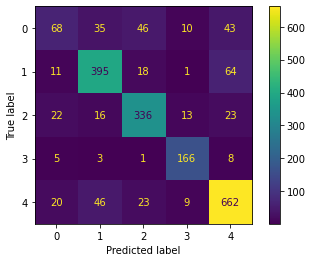

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.650163,0.605701,0.609480,0.612570
Naive Bayes,0.614990,0.597682,0.535747,0.547596
AdaBoost,0.689849,0.637553,0.628415,0.625900
Random Forest,0.780328,0.752918,0.709512,0.724199
XGBoost,0.795990,0.756011,0.748140,0.744930


In [43]:
#Y是否、是哪一四大事務所
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#ALL
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X6,y6)
MutiResultToFrame()

In [26]:
#for show and compare
forshow = pd.DataFrame({"2020平均":a["Mean"].values,
                        "2021平均":b["Mean"].values,
                        "2020標準差":a["StD"].values,
                        "2021標準差":b["StD"].values,
                        "2020最大":a["Max"].values,
                        "2021最大":b["Max"].values,
                        "2020最小":a["Min"].values,
                        "2021最小":b["Min"].values})
forshow.index = inde
forshow = forshow.round(4)
forshow["T-Score"] = c['T-Score'].values
forshow["P-Value"] = c['P-Value'].values


In [27]:
forshow

,2020平均,2021平均,2020標準差,2021標準差,2020最大,2021最大,2020最小,2021最小,T-Score,P-Value
KAM_len,1503.7950,1506.8232,283.7903,289.8888,3490.0000,3490.0000,134.0000,134.0000,-0.313889,0.753623
KAM項目數,1.6350,1.6245,0.7037,0.7002,5.0000,5.0000,1.0000,1.0000,0.444516,0.656696
KAM平均詞數,1037.4166,1045.2404,323.6476,325.3601,2958.0000,2928.0000,134.0000,134.0000,-0.716096,0.473979
爭議詞比例,0.0759,0.0758,0.0100,0.0102,0.1028,0.1028,0.0413,0.0413,0.307712,0.758319
強語氣詞比例,0.0021,0.0021,0.0007,0.0007,0.0169,0.0169,0.0000,0.0000,0.021382,0.982942
弱語氣詞比例,0.0056,0.0056,0.0009,0.0009,0.0099,0.0099,0.0000,0.0000,0.232955,0.815809
負面詞比例,0.0174,0.0175,0.0029,0.0030,0.0423,0.0423,0.0000,0.0000,-0.549131,0.582950
正面詞比例,0.0759,0.0758,0.0100,0.0102,0.1028,0.1028,0.0413,0.0413,0.307712,0.758319
不確定詞比例,0.0324,0.0324,0.0044,0.0045,0.0509,0.0509,0.0145,0.0149,-0.006998,0.994417
段落數,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,NaN,NaN


In [46]:
forshow1

,非四大平均,資誠平均,安侯平均,安永平均,勤業平均,非四大標準差,資誠標準差,安侯標準差,安永標準差,勤業標準差,F-Score,P-Value
KAM_len,1639.4653,1620.2045,1534.9659,1608.0328,1350.9197,312.0473,283.7432,279.0499,302.3120,187.5606,115.961599,3.355966e-89
KAM項目數,2.0050,1.8691,1.9268,1.9235,1.1592,0.7431,0.6460,0.7430,0.6330,0.4005,191.839794,1.036601e-139
KAM平均詞數,916.7829,945.6982,902.1246,916.0028,1230.7149,321.3416,271.0940,345.9842,317.8338,241.8182,138.233483,1.260946e-104
爭議詞比例,0.0749,0.0711,0.0782,0.0761,0.0780,0.0111,0.0089,0.0098,0.0094,0.0096,45.742506,7.593508e-37
強語氣詞比例,0.0021,0.0023,0.0018,0.0017,0.0023,0.0008,0.0009,0.0006,0.0005,0.0005,59.127088,2.745571e-47
弱語氣詞比例,0.0057,0.0056,0.0062,0.0049,0.0055,0.0010,0.0009,0.0011,0.0007,0.0007,76.390557,1.993309e-60
負面詞比例,0.0170,0.0175,0.0167,0.0170,0.0179,0.0029,0.0031,0.0024,0.0023,0.0030,13.814231,4.040302e-11
正面詞比例,0.0749,0.0711,0.0782,0.0761,0.0780,0.0111,0.0089,0.0098,0.0094,0.0096,45.742506,7.593508e-37
不確定詞比例,0.0333,0.0330,0.0350,0.0310,0.0306,0.0038,0.0048,0.0042,0.0028,0.0039,86.372029,7.393480e-68
段落數,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN
